In [207]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import ttest_1samp
from scipy.stats import binomtest
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

# load data
heart = pd.read_csv('heart_disease.csv')
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

In [173]:
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [174]:
no_hd.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence
5,56.0,male,120.0,236.0,atypical angina,0.0,0.0,178.0,absence
7,57.0,female,120.0,354.0,asymptomatic,1.0,0.0,163.0,absence


In [175]:
mean_col_yes_hd = yes_hd['chol'].mean()
print(mean_col_yes_hd)

251.4748201438849


The average cholesterol for people with heart diseases is 251 mg/dl

+ N~0~: People with heart disease have an average cholesterol level equal to 240 mg/dl
+ N~a~: People with heart disease have an average cholesterol level greater than 240 mg/dl

In [176]:
yes_hd['chol']

1      286.0
2      229.0
6      268.0
8      254.0
9      203.0
       ...  
297    241.0
298    264.0
299    193.0
300    131.0
301    236.0
Name: chol, Length: 139, dtype: float64

In [177]:
stat_value, p_value = ttest_1samp(a = yes_hd['chol'], popmean = 240)
print(stat_value)
print(p_value)

2.7337803003099808
0.007082206781031141


For a two-sided test:
+ P-value is 0.0070
+ statistical value is 2.733

Since we are trying to see if the avaerage cholesterol levels for patients with heart disease is greater than 240 mg/dl, we will be running a one-sided test. We simply divide this value by hald to get the p-value of a one-sided test.

In [178]:
one_sided_p_value = p_value / 2.0
print(one_sided_p_value)

0.0035411033905155707


### Do people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average?
The P-value is 0.0070 whihc is less than the alpha = 0.5, thus we conclude that we reject the Null hypothesis.
We accept the alterantive hypothesis by saying that the average cholesterol level of people with heart disease is greater than 240 mg/dl

# Cholesterol levels of patients without heart diseases

In [179]:
#calculate mean
no_hd.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence
5,56.0,male,120.0,236.0,atypical angina,0.0,0.0,178.0,absence
7,57.0,female,120.0,354.0,asymptomatic,1.0,0.0,163.0,absence


In [180]:
mean_col_no_hd = no_hd['chol'].mean()
print(mean_col_no_hd)

242.640243902439


In [181]:
no_hd_stat_value, no_hd_p_value = ttest_1samp(a = no_hd['chol'], popmean = 240)
print(no_hd_stat_value)
print(no_hd_p_value) # two-sided p-value

0.6325062182479374
0.5279424046444101


In [182]:
# p-value for one-sided test
no_hd_one_sided_p_value = no_hd_p_value / 2.0
print(no_hd_one_sided_p_value)

0.26397120232220506


The average cholesterol levels for people with no heart disease is **242 mg/dl**. This is closer to the population average of **240 mg/dl**.
The p-value for cholesterol levels for people with no heart disease is **0.26** which is significantly higher than the significance level of 0.05.
Since **0.26 > 0.05**, we **fail to reject the null hypothesis**. There is not enough evidence to prove a difference exists.

# Full dataset analysis

In [183]:
total_patients = heart['sex'].count()
print(total_patients)

303


The total patients in the data set is **303**.

In [184]:
num_hihghfbs_patients = heart['fbs'].sum()
print(num_hihghfbs_patients)

45.0


Since the data values in the fbs column are 0s and 1s, we can simply call the sum() fucntion to add all non zero values (patient's fasting blood sugar greater than 120 mg/dl). In this case, there are **45 out of 303 patients** who's fasting blood sugar is greater than 120 mg/dl.

In [185]:
eight_percent = 0.08 * 303
print(eight_percent)

24.240000000000002


Out of the 303 patients(if this number represented the whole population), which is **about 24 patients**. This number is **about half** the amount of people with fasting blood sugar levels greater than 120 mg/dl in the sample with 45 patients. 

### Does this sample come from a population in which the rate of fbs > 120 mg/dl is equal to 8%?

+ H~0~: This sample was drawn from a population **where 8%** of people have fasting blood sugar levels greater than 120 mg/dl.
+ H~a~: This sample was drawn from a population **where more than 8%** of people have fasting blood sugar levels greater than 120 mg/dl.

In [186]:
fbs_rate = binomtest(45, n=303, p=0.08, alternative = 'greater')
print(fbs_rate)

BinomTestResult(k=45, n=303, alternative='greater', statistic=0.1485148514851485, pvalue=4.689471951448875e-05)


The **p-value is 4.689e-05** which is significanlty less than the significance level of 0.05. Thus we **reject the null hypothesis** and 8% of this sample is significalty different than the expected proportion.

# Part 2:

In [187]:
heart = pd.read_csv('heart_disease.csv')

In [188]:
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [189]:
hd_absence_thalach = heart.loc[(heart.heart_disease == 'absence'), ['thalach', 'heart_disease']]
hd_absence_thalach

,thalach,heart_disease
0,150.0,absence
3,187.0,absence
4,172.0,absence
5,178.0,absence
7,163.0,absence
...,...,...
288,163.0,absence
289,169.0,absence
291,166.0,absence
295,182.0,absence


In [190]:
hd_present_thalach = heart.loc[(heart.heart_disease == 'presence'), ['thalach', 'heart_disease']]
hd_present_thalach

,thalach,heart_disease
1,108.0,presence
2,129.0,presence
6,160.0,presence
8,147.0,presence
9,155.0,presence
...,...,...
297,123.0,presence
298,132.0,presence
299,141.0,presence
300,115.0,presence


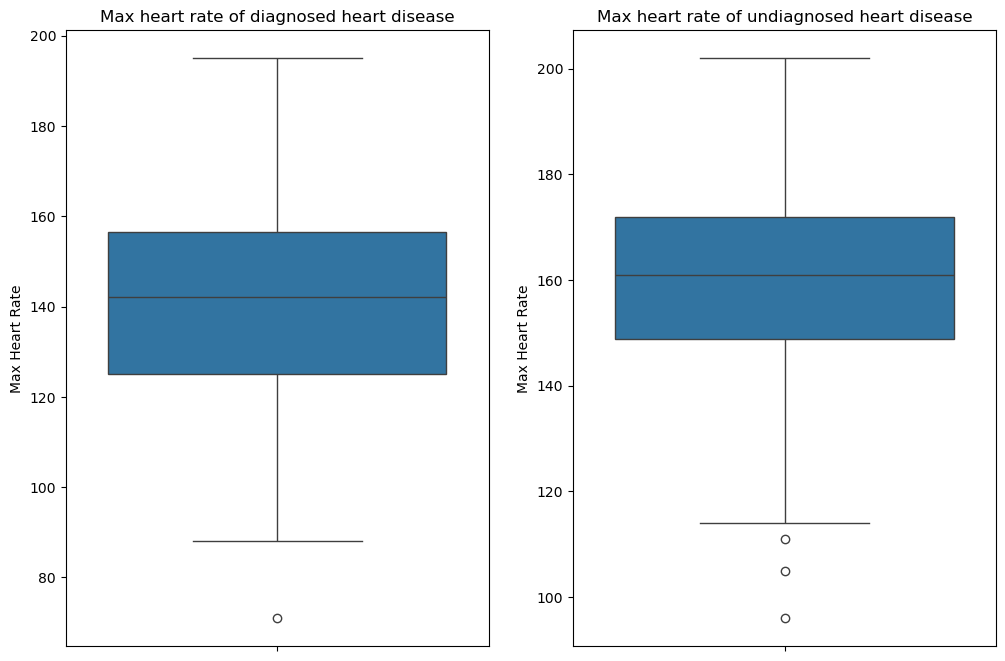

<Figure size 640x480 with 0 Axes>

In [191]:
fig, ax = plt.subplots(1,2, figsize = (12, 8)) # Create empty plots

sns.boxplot(data=hd_present_thalach, y ='thalach', ax = ax[0])
ax[0].set_title('Max heart rate of diagnosed heart disease')
ax[0].set_ylabel('Max Heart Rate')
sns.boxplot(data=hd_absence_thalach, y ='thalach', ax = ax[1])
ax[1].set_title('Max heart rate of undiagnosed heart disease')
ax[1].set_ylabel('Max Heart Rate')
plt.show()
plt.clf()

Based on this comparison, generally patients with diagnosed heart disease had lower heart rates than patients with no heart disease.

In [192]:
thalach_hd = heart.loc[(heart.heart_disease == 'presence'), ['thalach']]
thalach_no_hd = heart.loc[(heart.heart_disease == 'absence'), ['thalach']]

In [193]:
mean_difference = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print(mean_difference)

19.11905597473242


The mean difference in the maximum heart rate in patients with diagnosed heart disease and patients with no heart diaseas is **19.12**.

In [194]:
median_difference = np.median(thalach_no_hd) - np.median(thalach_hd)
print(median_difference)

19.0


The median difference in the maximum heart rate in patients with diagnosed heart disease and patients with no heart diaseas is **19**.

### Is the average thalach of a heart disease patient significantly different from the average thalach for a person without heart disease?

+ H0: The average thalach for a person with heart disease is **equal** to the average thalach for a person without heart disease.
+ Ha: The average thalach for a person with heart disease is **NOT equal** to the average thalach for a person without heart disease.

In [195]:
thalach_statistic_value, thalach_p_value = ttest_ind(thalach_hd, thalach_no_hd)
print(thalach_p_value)

[3.45696491e-14]


The **p-value is 3.45e-14** which is significantly smaller than 0.05 indicating that we reject the null hypothesis and say that there is a significant difference in the average thalach between a person with heart disease and a person without heart disease. 

### Looking at the relationship between resting heart rate in patient with and without heart disease

In [196]:
hd_resting_rate = heart.loc[(heart.heart_disease == 'presence'), ['trestbps', 'heart_disease']]
no_hd_resting_rate = heart.loc[(heart.heart_disease == 'absence'), ['trestbps', 'heart_disease']]

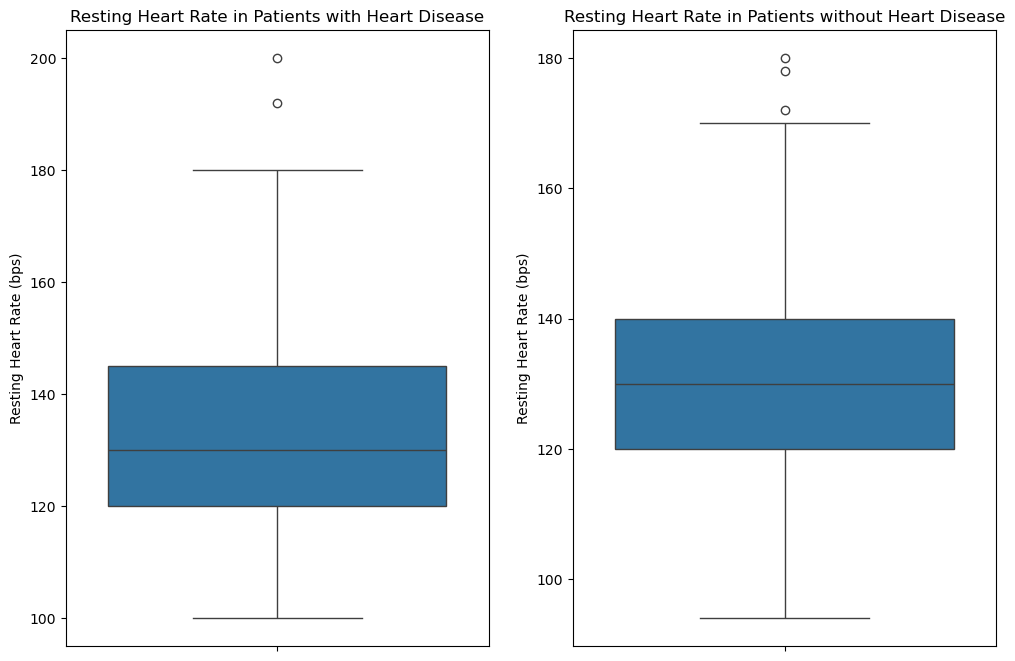

<Figure size 640x480 with 0 Axes>

In [197]:
fig, ax = plt.subplots(1,2, figsize = (12, 8))
sns.boxplot(data=hd_resting_rate, y ='trestbps', ax = ax[0])
ax[0].set_title('Resting Heart Rate in Patients with Heart Disease')
ax[0].set_ylabel('Resting Heart Rate (bps)')
sns.boxplot(data=no_hd_resting_rate, y ='trestbps', ax = ax[1])
ax[1].set_title('Resting Heart Rate in Patients without Heart Disease')
ax[1].set_ylabel('Resting Heart Rate (bps)')
plt.show()
plt.clf()

In [198]:
resting_hd = heart.loc[(heart.heart_disease == 'presence'), ['trestbps']]
resting_no_hd = heart.loc[(heart.heart_disease == 'absence'), ['trestbps']]
resting_hr_mean_difference = np.mean(resting_hd) - np.mean(resting_no_hd)
print(resting_hr_mean_difference)

5.318345323740999


People with heart disease have a much lower resting heart rate than people without. The **mean difference** between the two is **5.32**.

### Chest Pain and Max Heart Rate

In [199]:
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [200]:
heart.groupby(['cp']).cp.count()

cp
asymptomatic        144
atypical angina      50
non-anginal pain     86
typical angina       23
Name: cp, dtype: int64

In [201]:
asymp = heart.loc[(heart.cp == 'asymptomatic'), ['thalach']]
atyp_angina = heart.loc[(heart.cp == 'atypical angina'), ['thalach']]
non_anginal = heart.loc[(heart.cp == 'non-anginal pain'), ['thalach']]
typ_angina = heart.loc[(heart.cp == 'typical angina'), ['thalach']]

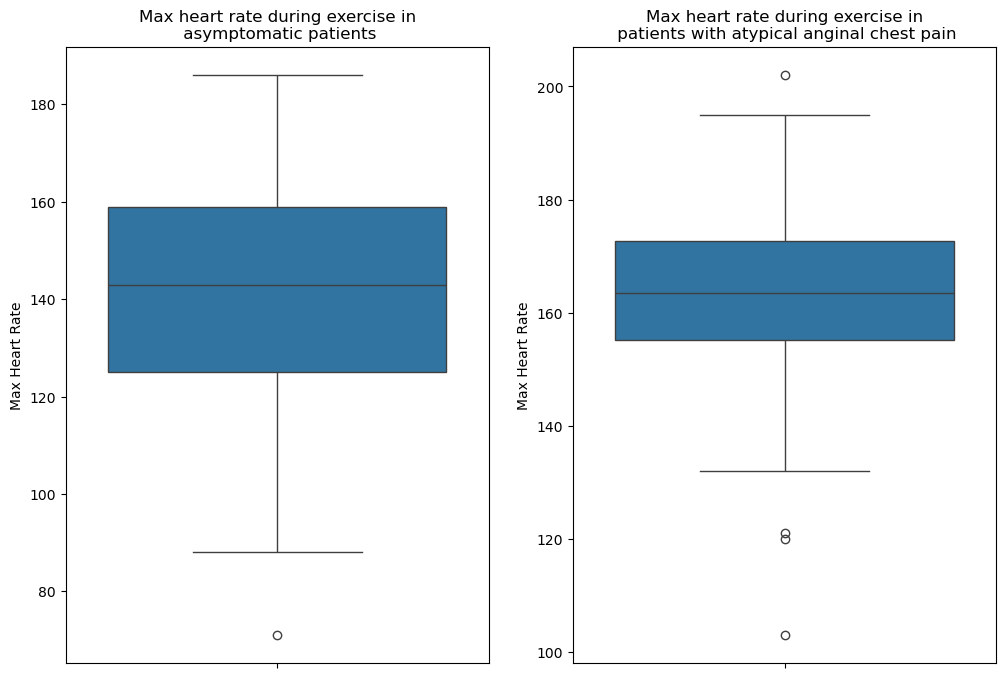

<Figure size 640x480 with 0 Axes>

In [202]:
fig, ax = plt.subplots(1,2, figsize = (12, 8))
sns.boxplot(data=asymp, y ='thalach', ax = ax[0])
ax[0].set_title('Max heart rate during exercise in\n asymptomatic patients')
ax[0].set_ylabel('Max Heart Rate')

sns.boxplot(data=atyp_angia, y ='thalach', ax = ax[1])
ax[1].set_title('Max heart rate during exercise in\n patients with atypical anginal chest pain')
ax[1].set_ylabel('Max Heart Rate')

plt.show()
plt.clf()

Text(0, 0.5, 'Max Heart Rate')

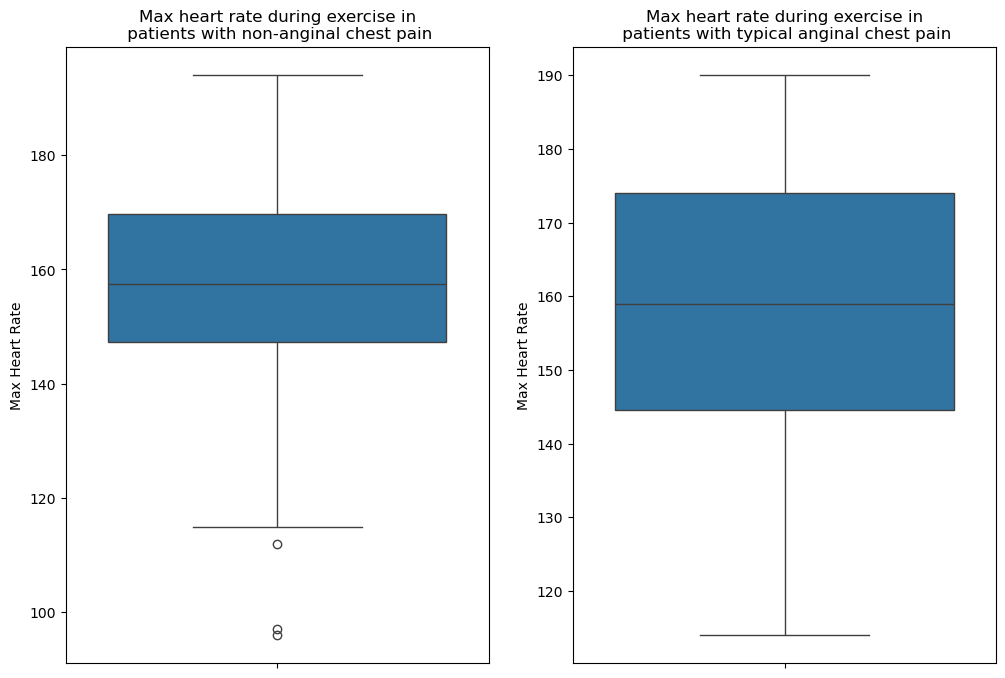

In [203]:
fig, ax = plt.subplots(1,2, figsize = (12, 8))
sns.boxplot(data=non_anginal, y ='thalach', ax = ax[0])
ax[0].set_title('Max heart rate during exercise in\n patients with non-anginal chest pain')
ax[0].set_ylabel('Max Heart Rate')

sns.boxplot(data=typ_angina, y ='thalach', ax = ax[1])
ax[1].set_title('Max heart rate during exercise in\n patients with typical anginal chest pain')
ax[1].set_ylabel('Max Heart Rate')

Non-anginal chest pain and atypical anginal chest pain have significantly higher max hear rates during exercise.

In [204]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

### Single Hypothesis Test

+ H0: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the **same average thalach**.
+ Ha: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people **do not all have the same average thalach**.

In [205]:
results = pairwise_tukeyhsd(endog = heart.thalach, groups = heart.cp)
print(results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


### Heart Disease and Chest Pain

In [206]:
ch_cp_crosstable = pd.crosstab(heart.cp, heart.heart_disease)
print(ch_cp_crosstable)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [210]:
chi2, pval, dof, exp = chi2_contingency(ch_cp_crosstable)
print(chi2)
print(pval)
print(dof)
print(exp)

81.81577027653815
1.2517106007837527e-17
3
[[77.94059406 66.05940594]
 [27.06270627 22.93729373]
 [46.54785479 39.45214521]
 [12.44884488 10.55115512]]
